In [74]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
import tensorflow as tf
set_random_seed(42)
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns
from matplotlib import pyplot as plt

In [75]:
import tensorflow as tf 
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [76]:
def load_data():
    TRAIN_DATA = "./ch2_train.csv"
    df = pd.read_csv(TRAIN_DATA)
    y = df.iloc[:, 10]
    X = df.iloc[:, 0:10]
    print(y[0:5])
    print(X[0:5])
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    X_val, X_test, y_val, y_test = train_test_split(X,y, test_size = 0.5)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [77]:
# COMPLETE THIS FUNCTION

def build_network(input_features=None):
    # first we specify an input layer, with a shape == features
    inputs = Input(shape=(input_features,), name="input")
    
    # One or more layers should go here !!!!
    x = Dense(32, activation='relu', name="hidden1")(inputs)
    x = Dense(32, activation='relu', name="hidden2")(x)
    #x = Dense(32, activation='relu', name="hidden3")(x)
    # for regression we will use a single neuron with linear (no) activation
    prediction = Dense(1, activation='linear', name="final")(x)

    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse','mape','cosine','acc'])
    return model

In [78]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

0   -1.492607
1    0.001870
2   -3.026610
3    2.582999
4   -1.375630
Name: y, dtype: float64
         x0        x1        x2        x3        x4        x5        x6  \
0  0.002180  0.009120 -0.013605 -0.008808  0.001073 -0.000740  0.002386   
1  0.004854 -0.003313 -0.001952  0.002670 -0.006725 -0.002017 -0.002849   
2 -0.003369 -0.006110 -0.006696 -0.022039 -0.000381  0.003571 -0.007350   
3  0.004071  0.006069  0.001937  0.006065 -0.007948  0.000772  0.012258   
4 -0.003275  0.005618  0.003749 -0.011370  0.000889 -0.001856  0.000228   

         x7        x8        x9  
0 -0.005520 -0.014143  0.001899  
1  0.000822  0.008339  0.002317  
2 -0.000669 -0.016077 -0.006384  
3  0.008331  0.017416  0.002310  
4 -0.007770 -0.016849  0.000354  


In [79]:
print("Shape X_train:" + str(X_train.shape))
print("Shape X_val:" + str(X_val.shape))
print("Shape X_test :" + str(X_test.shape))

Shape X_train:(3200, 10)
Shape X_val:(2000, 10)
Shape X_test :(2000, 10)


In [80]:
input_features = X_train.shape[1]
model = build_network(input_features=input_features)

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 10)                0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                352       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
final (Dense)                (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [82]:
print("Trainable Params: " + str(1441))

Trainable Params: 1441


In [83]:
# Fit your MLP
# You may choose to adjust the number of epochs, batch size, or model to get a better result.
model.fit(x=X_train.values, y=y_train, batch_size=10, epochs=200, verbose=1, validation_data=(X_val.values, y_val))

Train on 3200 samples, validate on 2000 samples
Epoch 1/200
3200/3200 [==============================] - 2s 606us/step - loss: 1.2167 - mean_absolute_error: 0.8783 - mean_squared_error: 1.2167 - mean_absolute_percentage_error: 107.3645 - cosine_proximity: -0.4563 - acc: 0.0000e+00 - val_loss: 0.6322 - val_mean_absolute_error: 0.6336 - val_mean_squared_error: 0.6322 - val_mean_absolute_percentage_error: 94.6254 - val_cosine_proximity: -0.8100 - val_acc: 0.0000e+00
Epoch 2/200
3200/3200 [==============================] - 1s 420us/step - loss: 0.1948 - mean_absolute_error: 0.3126 - mean_squared_error: 0.1948 - mean_absolute_percentage_error: 91.8754 - cosine_proximity: -0.8463 - acc: 0.0000e+00 - val_loss: 0.0310 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0310 - val_mean_absolute_percentage_error: 52.3112 - val_cosine_proximity: -0.9100 - val_acc: 0.0000e+00
Epoch 3/200
3200/3200 [==============================] - 1s 455us/step - loss: 0.0132 - mean_absolute_error: 0.07

Epoch 20/200
3200/3200 [==============================] - 1s 406us/step - loss: 6.7315e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 6.7315e-06 - mean_absolute_percentage_error: 0.6704 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 8.2000e-06 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 8.2000e-06 - val_mean_absolute_percentage_error: 1.0924 - val_cosine_proximity: -0.9980 - val_acc: 0.0000e+00
Epoch 21/200
3200/3200 [==============================] - 1s 403us/step - loss: 6.1193e-05 - mean_absolute_error: 0.0053 - mean_squared_error: 6.1193e-05 - mean_absolute_percentage_error: 2.2271 - cosine_proximity: -0.9981 - acc: 0.0000e+00 - val_loss: 1.5768e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.5768e-06 - val_mean_absolute_percentage_error: 0.4635 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 22/200
3200/3200 [==============================] - 2s 496us/step - loss: 8.2852e-06 - mean_absolute_error: 0.0022 - mean_squa

Epoch 39/200
3200/3200 [==============================] - 1s 400us/step - loss: 6.5842e-07 - mean_absolute_error: 5.8279e-04 - mean_squared_error: 6.5842e-07 - mean_absolute_percentage_error: 0.2811 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 5.3455e-07 - val_mean_absolute_error: 5.8872e-04 - val_mean_squared_error: 5.3455e-07 - val_mean_absolute_percentage_error: 0.2804 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 40/200
3200/3200 [==============================] - 1s 424us/step - loss: 2.4231e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.4231e-06 - mean_absolute_percentage_error: 0.5482 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 9.0133e-06 - val_mean_absolute_error: 0.0030 - val_mean_squared_error: 9.0133e-06 - val_mean_absolute_percentage_error: 1.3293 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 41/200
3200/3200 [==============================] - 1s 404us/step - loss: 1.0139e-04 - mean_absolute_error: 0.0049 - m

Epoch 58/200
3200/3200 [==============================] - 1s 399us/step - loss: 6.0202e-05 - mean_absolute_error: 0.0050 - mean_squared_error: 6.0202e-05 - mean_absolute_percentage_error: 2.4010 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 5.9742e-05 - val_mean_absolute_error: 0.0062 - val_mean_squared_error: 5.9742e-05 - val_mean_absolute_percentage_error: 3.0761 - val_cosine_proximity: -0.9970 - val_acc: 0.0000e+00
Epoch 59/200
3200/3200 [==============================] - 1s 397us/step - loss: 1.4775e-05 - mean_absolute_error: 0.0022 - mean_squared_error: 1.4775e-05 - mean_absolute_percentage_error: 1.7853 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 2.4299e-05 - val_mean_absolute_error: 0.0046 - val_mean_squared_error: 2.4299e-05 - val_mean_absolute_percentage_error: 2.0407 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 60/200
3200/3200 [==============================] - 1s 406us/step - loss: 6.5002e-05 - mean_absolute_error: 0.0060 - mean_squa

Epoch 77/200
3200/3200 [==============================] - 2s 614us/step - loss: 1.7735e-07 - mean_absolute_error: 2.6022e-04 - mean_squared_error: 1.7735e-07 - mean_absolute_percentage_error: 0.1249 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 2.1152e-07 - val_mean_absolute_error: 3.7944e-04 - val_mean_squared_error: 2.1152e-07 - val_mean_absolute_percentage_error: 0.1577 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 78/200
3200/3200 [==============================] - 2s 627us/step - loss: 1.7154e-07 - mean_absolute_error: 2.7419e-04 - mean_squared_error: 1.7154e-07 - mean_absolute_percentage_error: 0.1664 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 1.6838e-08 - val_mean_absolute_error: 8.6887e-05 - val_mean_squared_error: 1.6838e-08 - val_mean_absolute_percentage_error: 0.0359 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 79/200
3200/3200 [==============================] - 2s 622us/step - loss: 3.4305e-07 - mean_absolute_error: 4.

Epoch 96/200
3200/3200 [==============================] - 2s 591us/step - loss: 3.4401e-05 - mean_absolute_error: 0.0036 - mean_squared_error: 3.4401e-05 - mean_absolute_percentage_error: 1.2495 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 1.6794e-07 - val_mean_absolute_error: 3.8906e-04 - val_mean_squared_error: 1.6794e-07 - val_mean_absolute_percentage_error: 0.1656 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 97/200
3200/3200 [==============================] - 2s 592us/step - loss: 3.2065e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 3.2065e-05 - mean_absolute_percentage_error: 1.5608 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 1.8289e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.8289e-06 - val_mean_absolute_percentage_error: 0.4694 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 98/200
3200/3200 [==============================] - 2s 593us/step - loss: 9.7049e-05 - mean_absolute_error: 0.0065 - mean_

Epoch 115/200
3200/3200 [==============================] - 2s 508us/step - loss: 5.0936e-06 - mean_absolute_error: 0.0016 - mean_squared_error: 5.0936e-06 - mean_absolute_percentage_error: 0.8940 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 2.4160e-05 - val_mean_absolute_error: 0.0048 - val_mean_squared_error: 2.4160e-05 - val_mean_absolute_percentage_error: 2.0647 - val_cosine_proximity: -0.9960 - val_acc: 0.0000e+00
Epoch 116/200
3200/3200 [==============================] - 2s 547us/step - loss: 7.1847e-05 - mean_absolute_error: 0.0063 - mean_squared_error: 7.1847e-05 - mean_absolute_percentage_error: 2.9999 - cosine_proximity: -0.9969 - acc: 0.0000e+00 - val_loss: 1.3919e-05 - val_mean_absolute_error: 0.0033 - val_mean_squared_error: 1.3919e-05 - val_mean_absolute_percentage_error: 1.4241 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 117/200
3200/3200 [==============================] - 2s 494us/step - loss: 6.9274e-06 - mean_absolute_error: 0.0014 - mean_s

Epoch 134/200
3200/3200 [==============================] - 2s 496us/step - loss: 2.8670e-07 - mean_absolute_error: 3.7413e-04 - mean_squared_error: 2.8670e-07 - mean_absolute_percentage_error: 0.1584 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 4.8345e-07 - val_mean_absolute_error: 6.0495e-04 - val_mean_squared_error: 4.8345e-07 - val_mean_absolute_percentage_error: 0.2360 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 135/200
3200/3200 [==============================] - 2s 488us/step - loss: 1.8198e-05 - mean_absolute_error: 0.0027 - mean_squared_error: 1.8198e-05 - mean_absolute_percentage_error: 1.5610 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 7.8816e-06 - val_mean_absolute_error: 0.0026 - val_mean_squared_error: 7.8816e-06 - val_mean_absolute_percentage_error: 1.1942 - val_cosine_proximity: -0.9970 - val_acc: 0.0000e+00
Epoch 136/200
3200/3200 [==============================] - 2s 486us/step - loss: 3.2135e-05 - mean_absolute_error: 0.0043 

Epoch 153/200
3200/3200 [==============================] - 2s 676us/step - loss: 5.6872e-05 - mean_absolute_error: 0.0038 - mean_squared_error: 5.6872e-05 - mean_absolute_percentage_error: 1.3176 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 8.7726e-08 - val_mean_absolute_error: 2.1257e-04 - val_mean_squared_error: 8.7726e-08 - val_mean_absolute_percentage_error: 0.0719 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 154/200
3200/3200 [==============================] - 2s 575us/step - loss: 2.5500e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.5500e-06 - mean_absolute_percentage_error: 0.5210 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 6.6533e-07 - val_mean_absolute_error: 6.5221e-04 - val_mean_squared_error: 6.6533e-07 - val_mean_absolute_percentage_error: 0.2917 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 155/200
3200/3200 [==============================] - 2s 534us/step - loss: 5.2990e-05 - mean_absolute_error: 0.0048 

Epoch 172/200
3200/3200 [==============================] - 2s 571us/step - loss: 4.3606e-05 - mean_absolute_error: 0.0040 - mean_squared_error: 4.3606e-05 - mean_absolute_percentage_error: 2.1447 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 2.2605e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 2.2605e-05 - val_mean_absolute_percentage_error: 1.4655 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 173/200
3200/3200 [==============================] - 2s 618us/step - loss: 2.5238e-05 - mean_absolute_error: 0.0040 - mean_squared_error: 2.5238e-05 - mean_absolute_percentage_error: 1.9753 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 2.7368e-05 - val_mean_absolute_error: 0.0047 - val_mean_squared_error: 2.7368e-05 - val_mean_absolute_percentage_error: 2.0428 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 174/200
3200/3200 [==============================] - 2s 626us/step - loss: 2.0620e-06 - mean_absolute_error: 9.3958e-04 - me

Epoch 191/200
3200/3200 [==============================] - 2s 566us/step - loss: 4.7515e-07 - mean_absolute_error: 4.8295e-04 - mean_squared_error: 4.7515e-07 - mean_absolute_percentage_error: 0.2131 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 1.2556e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.2556e-06 - val_mean_absolute_percentage_error: 0.4876 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 192/200
3200/3200 [==============================] - 2s 581us/step - loss: 1.0618e-04 - mean_absolute_error: 0.0068 - mean_squared_error: 1.0618e-04 - mean_absolute_percentage_error: 2.8538 - cosine_proximity: -0.9969 - acc: 0.0000e+00 - val_loss: 3.8772e-05 - val_mean_absolute_error: 0.0049 - val_mean_squared_error: 3.8772e-05 - val_mean_absolute_percentage_error: 1.8368 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 193/200
3200/3200 [==============================] - 2s 592us/step - loss: 1.2666e-05 - mean_absolute_error: 0.0016 - me

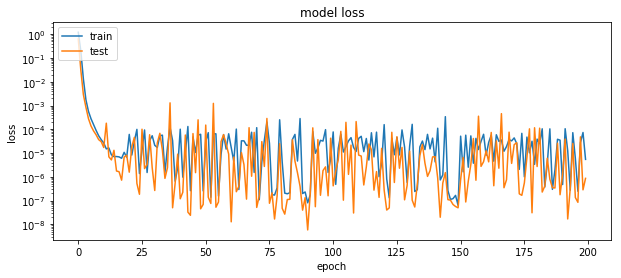

<Figure size 432x288 with 0 Axes>

In [91]:
# summarize history for loss
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf()

In [85]:
print("Model Train MAE: " + str(mean_absolute_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_absolute_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_absolute_error(y_test, model.predict(X_test.values))))

Model Train MAE: 0.0008176330381378447
Model Val MAE: 0.0008211842337380019
Model Test MAE: 0.000808134661474716


In [86]:
print("Model Train MAE: " + str(mean_squared_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_squared_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_squared_error(y_test, model.predict(X_test.values))))

Model Train MAE: 8.817055761068478e-07
Model Val MAE: 8.645106361812502e-07
Model Test MAE: 8.862653990320075e-07


In [87]:
print("Model Train MAE: " + str(mean_squared_log_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_squared_log_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_squared_log_error(y_test, model.predict(X_test.values))))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

Q3: Is your model underfitting, overfitting, or neither?


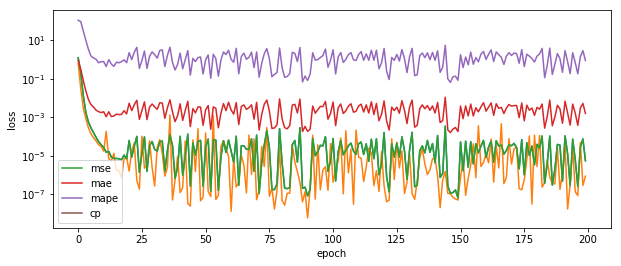

In [89]:
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['mean_squared_error'], label='mse')
plt.plot(model.history.history['mean_absolute_error'], label='mae')
plt.plot(model.history.history['mean_absolute_percentage_error'], label='mape')
plt.plot(model.history.history['cosine_proximity'], label='cp')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend()

In [90]:
print("Q3: Is your model underfitting, overfitting, or neither? Overfitting")

Q3: Is your model underfitting, overfitting, or neither? Overfitting
